In [160]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


<h3> Panorama Geral </h3>

Foram montados 5 diferentes cenários em um dispositivo eletromecânico para simular situações em que o sistema está normal e de falhas: normal, desacoplado, sobrecarga, desbalanceado e desalinhado.
A partir destes cenários, foram coletados diferentes dados que indicam como o sistema se comportou em cada situação.

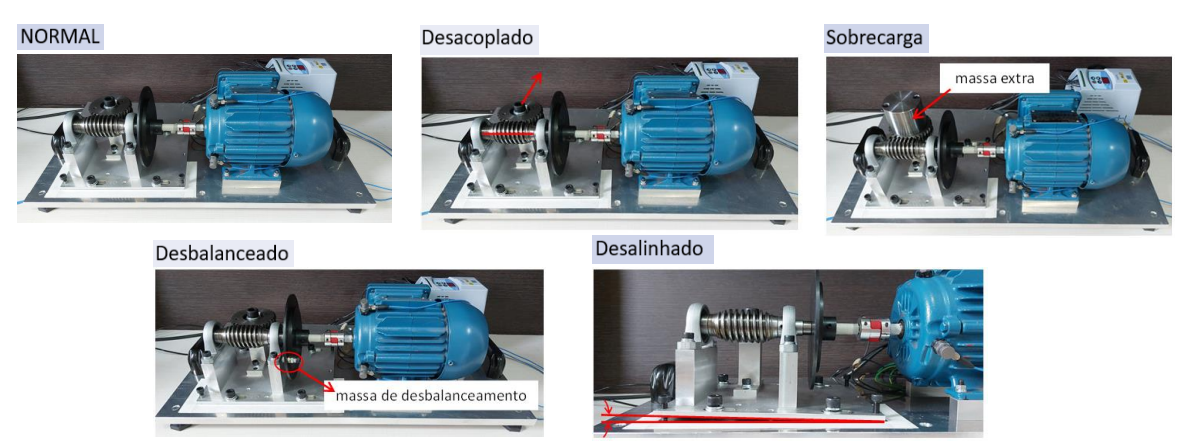

<h3>Objetivo</h3>

Com os dados coletados, deve-se desenvolver um modelo capaz de classificar o cenário em que o dispositivo eletromecânico se encontra a partir de novos valores de atributos que não estão no dataset.

In [161]:
import pandas as pd

caminho_arquivo = "data-33
-set_csv.xls"

df = pd.read_csv(caminho_arquivo) 

df #Análise da Base de dados

tempo_s  tipo_setup  I_entrada_A  P_entrada_W  I_saida_A  \
0        0.00         0.0      0.44905     63.67320    1.43660   
1        0.08         0.0      0.44610     69.40320    1.67860   
2        0.16         0.0      0.45175     69.11385    1.39950   
3        0.24         0.0      0.43510     68.85665    1.39705   
4        0.32         0.0      0.45055     70.52860    1.43375   
...       ...         ...          ...          ...        ...   
2500    39.68         4.0      0.46575     68.42795    1.59235   
2501    39.76         4.0      0.44705     62.32815    1.57365   
2502    39.84         4.0      0.47110     76.04075    1.77275   
2503    39.92         4.0      0.47745     72.86850    1.39700   
2504    40.00         4.0      0.48705     70.70715    1.51215   

      DesvPad_I_entrada_A  DesvPad _P_entrada_W  DesvPad _I_saida_A  \
0                0.042740             21.869566            0.113479   
1                0.048945              1.600020            0.854342   
2                0.042337              5.220348            0.284000   
3                0.063224              3.437546            0.219507   
4                0.048497              1.240032            0.111967   
...                   ...                   ...                 ...   
2500             0.042147              8.058820            0.900427   
2501             0.068987             15.876663            0.904702   
2502             0.045194             34.799709            1.657858   
2503             0.043033              0.826486            0.131019   
2504             0.114987             12.366981            0.514260   

      Amp_I_entrada_A  Amp_P_entrada_W  Amp_I_saida_A  Kurtosis_I_entrada_A  \
0               0.175           91.738          0.406             12.474475   
1               0.227            7.359          3.843             20.070610   
2               0.207           24.185          1.395             19.087723   
3               0.228           16.040          0.973              6.869051   
4               0.222            4.394          0.425             20.205840   
...               ...              ...            ...                   ...   
2500            0.199           37.403          4.276              5.486469   
2501            0.231           62.159          4.218              5.237910   
2502            0.191          184.906          7.810              9.874863   
2503            0.194            2.893          0.383             21.320253   
2504            0.608           41.761          2.476             10.119385   

      Kurtosis_P_entrada_W  Kurtosis_I_saida_A  Mag_S1_f1_dBrms  \
0                15.435837            4.223108       -50.647991   
1                13.335535           16.966677       -50.696943   
2                 7.345771           11.032327       -47.724322   
3                19.849528            9.136137       -47.652608   
4                 2.325535            2.818658       -47.019446   
...                    ...                 ...              ...   
2500             22.266532           21.582764       -33.195195   
2501             11.518238           21.593782       -33.360763   
2502             20.660427            6.075266       -33.497896   
2503              2.327027            1.904577       -33.581380   
2504              6.899001           20.098625       -33.599577   

      Mag_S1_f2_dBrms  Mag_S1_f3_dBrms  Mag_S2_f1_dBrms  Mag_S2_f2_dBrms  \
0          -63.189443       -47.864704       -59.629807       -73.010381   
1          -63.340003       -48.313132       -59.591150       -72.360239   
2          -62.837371       -48.384219       -55.194912       -63.127903   
3          -62.613368       -48.768793       -55.275822       -63.310116   
4          -61.314274       -49.016646       -54.665312       -60.825200   
...               ...              ...              ...              ...   
2500       -52.502279       -41.610532       -37.874381       -49.147213  

Boxplots são uma excelente maneira de visualizar a distribuição dos dados e identificar outliers. Com a ferramenta sns.boxplot da biblioteca Seaborn, podemos crirar boxplots avançados e personalizados com facilidade. 
Na visualização dos gráficos abaixo, é notável que há uma presença considerável de outliers nas dados das correntes (saída e entrada) e da potência, o que, consequentemente, também resulta na presença de outliers para os atributos que têm relação com estas grandezas (desvio Padrão e amplitude), o que pode levar a conclusões equivocadas do modelo. Os outliers não necessariamente representam um problema com a qualidade dos dados. Valores atípicos podem sugerir a presença de ruído quanto podem ser valores legítimos. Em um grande número de problemas reais, outliers são informações relevantes que ajudam a identificcar problemas ou falhas em algum processo.


Os gráficos também são importantes para que a análise da distribuição dos dados de diferentes classes ao mesmo tempo seja feita. Isso por conta de que, quando os dados são distribuídos de uma maneira específica para cada classificação, quer dizer que o atributo que resultou nesse comportamento diferente de cada classe pode ser útil para o algoritmo de classificação identificar padrões que diferem uma classe da outra. Caso as distribuições sejam sempre as mesmas para todos os atributos, pode ser difícil identificar as peculiaridades de cada classe. Por isso, é importante enaltecer que os atributos 'Mag_S1_f1_dBrms', 'Mag_S1_f2_dBrms', 'Mag_S1_f3_dBrms', 'Mag_S2_f2_dBrms', 'Mag_S2_f3_dBrms', 'Mag_S1_f1' são os que mais apresentam variedade na distribuição de dados entre uma classe e outra. Portanto, podem ser um caminho para treinar o modelo de forma mais eficiente.


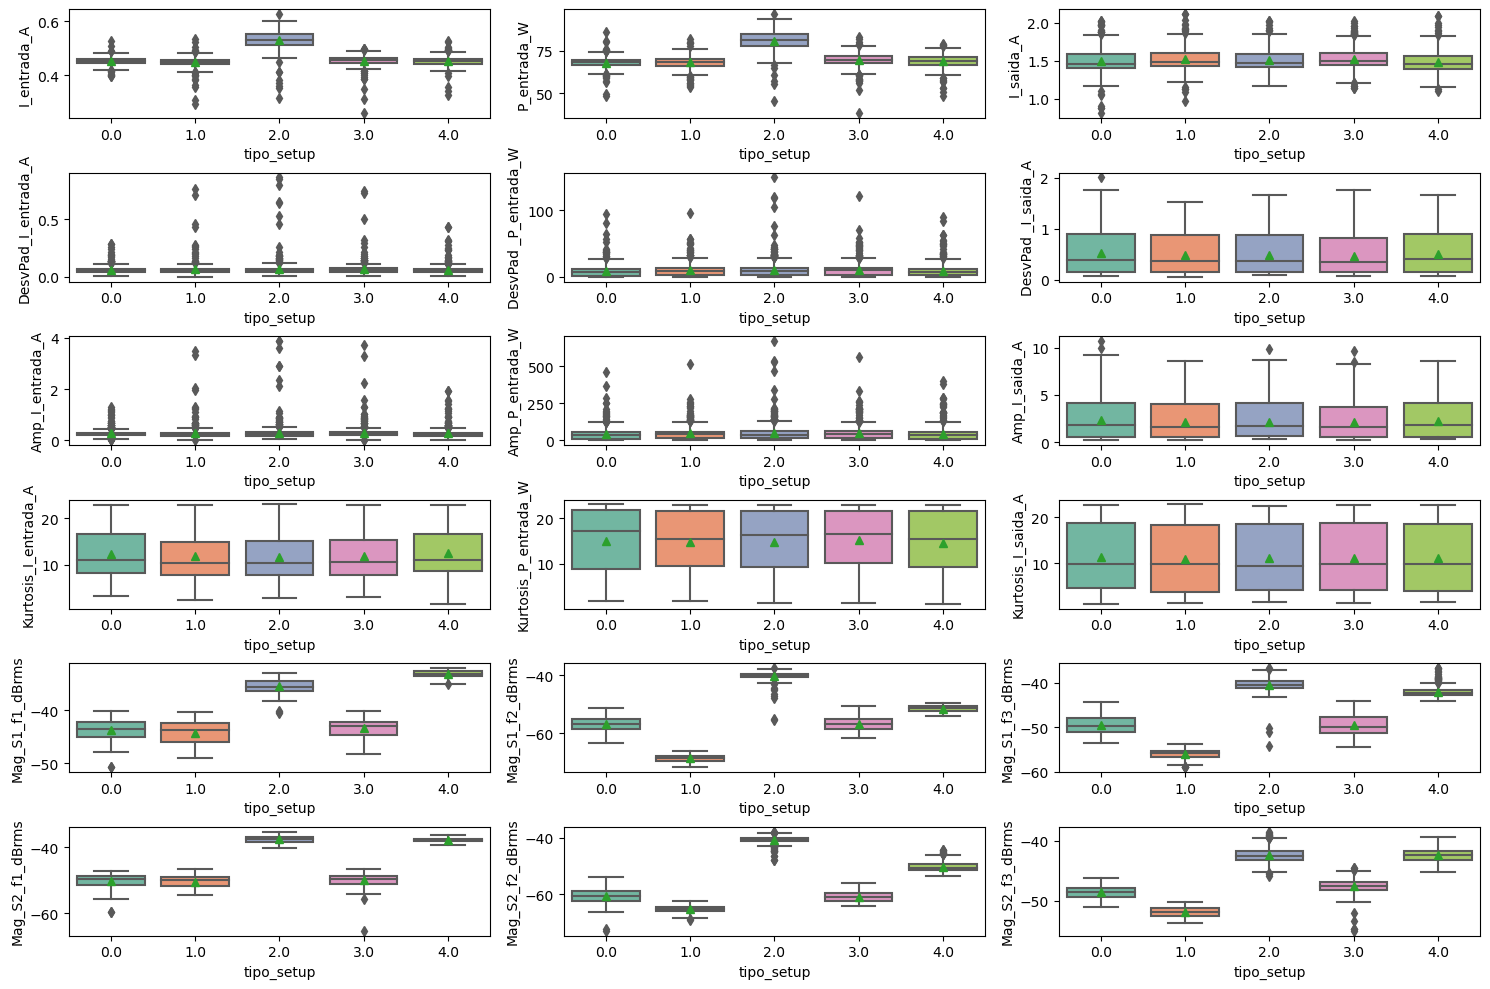

In [162]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[2:]):
    plt.subplot(6, 3, i+1)
    sns.boxplot(x='tipo_setup', y=column, data=df, showmeans=True, palette='Set2')
    # plt.title(f'Boxplot de {column} por medição')
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Aumenta o espaço entre as subplots
plt.show()


<h3>Identificação de Valores Nulos</h3>

Valores nulos presentes no dataset podem introduzir biases nas análises estatísticas, levando a predições com menos acurácia

In [163]:
null_values = df.isnull().sum()

null_values #Verificando se há valores nulos

tempo_s                 0
tipo_setup              0
I_entrada_A             0
P_entrada_W             0
I_saida_A               0
DesvPad_I_entrada_A     0
DesvPad _P_entrada_W    0
DesvPad _I_saida_A      0
Amp_I_entrada_A         0
Amp_P_entrada_W         0
Amp_I_saida_A           0
Kurtosis_I_entrada_A    0
Kurtosis_P_entrada_W    0
Kurtosis_I_saida_A      0
Mag_S1_f1_dBrms         0
Mag_S1_f2_dBrms         0
Mag_S1_f3_dBrms         0
Mag_S2_f1_dBrms         0
Mag_S2_f2_dBrms         0
Mag_S2_f3_dBrms         0
dtype: int64

In [164]:
df['tipo_setup'] = df['tipo_setup'].map({0: 'Normal', 1: 'Desacoplado', 2: 'Sobrecarga', 3: 'Desbalanceado', 4: 'Desalinhado'})

df

tempo_s   tipo_setup  I_entrada_A  P_entrada_W  I_saida_A  \
0        0.00       Normal      0.44905     63.67320    1.43660   
1        0.08       Normal      0.44610     69.40320    1.67860   
2        0.16       Normal      0.45175     69.11385    1.39950   
3        0.24       Normal      0.43510     68.85665    1.39705   
4        0.32       Normal      0.45055     70.52860    1.43375   
...       ...          ...          ...          ...        ...   
2500    39.68  Desalinhado      0.46575     68.42795    1.59235   
2501    39.76  Desalinhado      0.44705     62.32815    1.57365   
2502    39.84  Desalinhado      0.47110     76.04075    1.77275   
2503    39.92  Desalinhado      0.47745     72.86850    1.39700   
2504    40.00  Desalinhado      0.48705     70.70715    1.51215   

      DesvPad_I_entrada_A  DesvPad _P_entrada_W  DesvPad _I_saida_A  \
0                0.042740             21.869566            0.113479   
1                0.048945              1.600020            0.854342   
2                0.042337              5.220348            0.284000   
3                0.063224              3.437546            0.219507   
4                0.048497              1.240032            0.111967   
...                   ...                   ...                 ...   
2500             0.042147              8.058820            0.900427   
2501             0.068987             15.876663            0.904702   
2502             0.045194             34.799709            1.657858   
2503             0.043033              0.826486            0.131019   
2504             0.114987             12.366981            0.514260   

      Amp_I_entrada_A  Amp_P_entrada_W  Amp_I_saida_A  Kurtosis_I_entrada_A  \
0               0.175           91.738          0.406             12.474475   
1               0.227            7.359          3.843             20.070610   
2               0.207           24.185          1.395             19.087723   
3               0.228           16.040          0.973              6.869051   
4               0.222            4.394          0.425             20.205840   
...               ...              ...            ...                   ...   
2500            0.199           37.403          4.276              5.486469   
2501            0.231           62.159          4.218              5.237910   
2502            0.191          184.906          7.810              9.874863   
2503            0.194            2.893          0.383             21.320253   
2504            0.608           41.761          2.476             10.119385   

      Kurtosis_P_entrada_W  Kurtosis_I_saida_A  Mag_S1_f1_dBrms  \
0                15.435837            4.223108       -50.647991   
1                13.335535           16.966677       -50.696943   
2                 7.345771           11.032327       -47.724322   
3                19.849528            9.136137       -47.652608   
4                 2.325535            2.818658       -47.019446   
...                    ...                 ...              ...   
2500             22.266532           21.582764       -33.195195   
2501             11.518238           21.593782       -33.360763   
2502             20.660427            6.075266       -33.497896   
2503              2.327027            1.904577       -33.581380   
2504              6.899001           20.098625       -33.599577   

      Mag_S1_f2_dBrms  Mag_S1_f3_dBrms  Mag_S2_f1_dBrms  Mag_S2_f2_dBrms  \
0          -63.189443       -47.864704       -59.629807       -73.010381   
1          -63.340003       -48.313132       -59.591150       -72.360239   
2          -62.837371       -48.384219       -55.194912       -63.127903   
3          -62.613368       -48.768793       -55.275822       -63.310116   
4          -61.314274       -49.016646       -54.665312       -60.825200   
...               ...              ...              ...              ...   
2500       -52.502279       -41.610532       -37.874381       

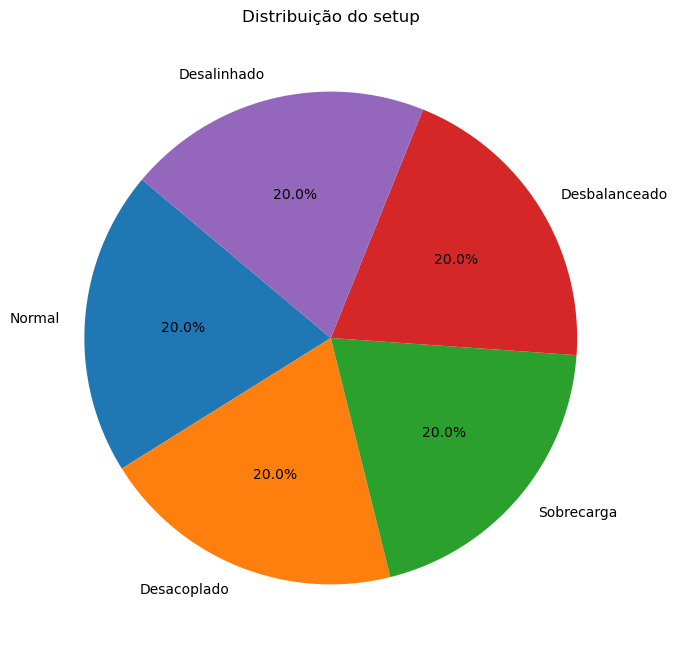

In [165]:
# 1. Gráfico de pizza das classes

class_distribution = df['tipo_setup'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição do setup')
plt.show() 

<h3>SNS PAIRPLOT</h3>

Abaixo, o dataset foi dividido em 3 subsets, para que a visualização dos gráficos seja melhor.
O Seaborn Pairplot permite plotar relações entre pares de variáveis dentro de um conjunto de dados. Isso cria uma visualização que resume uma grande quantidade de dados em uma única figura, tornando mais fácil compreendê-los. Esse tipo de gráfico é essencial quando estamos explorando nosso conjunto de dados e tentando nos familiarizar com ele. Pode-se analisar que os atributos que geram menos correlação entre as classes são os mesmos analisados nos bloxplots acima.

In [166]:
# Número total de colunas
total_cols = df.columns[1:] 

one_third = len(total_cols) // 3

subset_1 = df[df.columns[2:8]].copy()  # Subconjunto de colunas
subset_1['tipo_setup'] = df['tipo_setup']  # Adiciona a coluna 'tipo_setup'


subset_2 = df[df.columns[8:14]].copy()  # Subconjunto de colunas
subset_2['tipo_setup'] = df['tipo_setup']  # Adiciona a coluna 'tipo_setup'


subset_3 = df[df.columns[14:20]].copy()  # Subconjunto de colunas
subset_3['tipo_setup'] = df['tipo_setup']  # Adiciona a coluna 'tipo_setup'


<Figure size 1000x800 with 0 Axes>

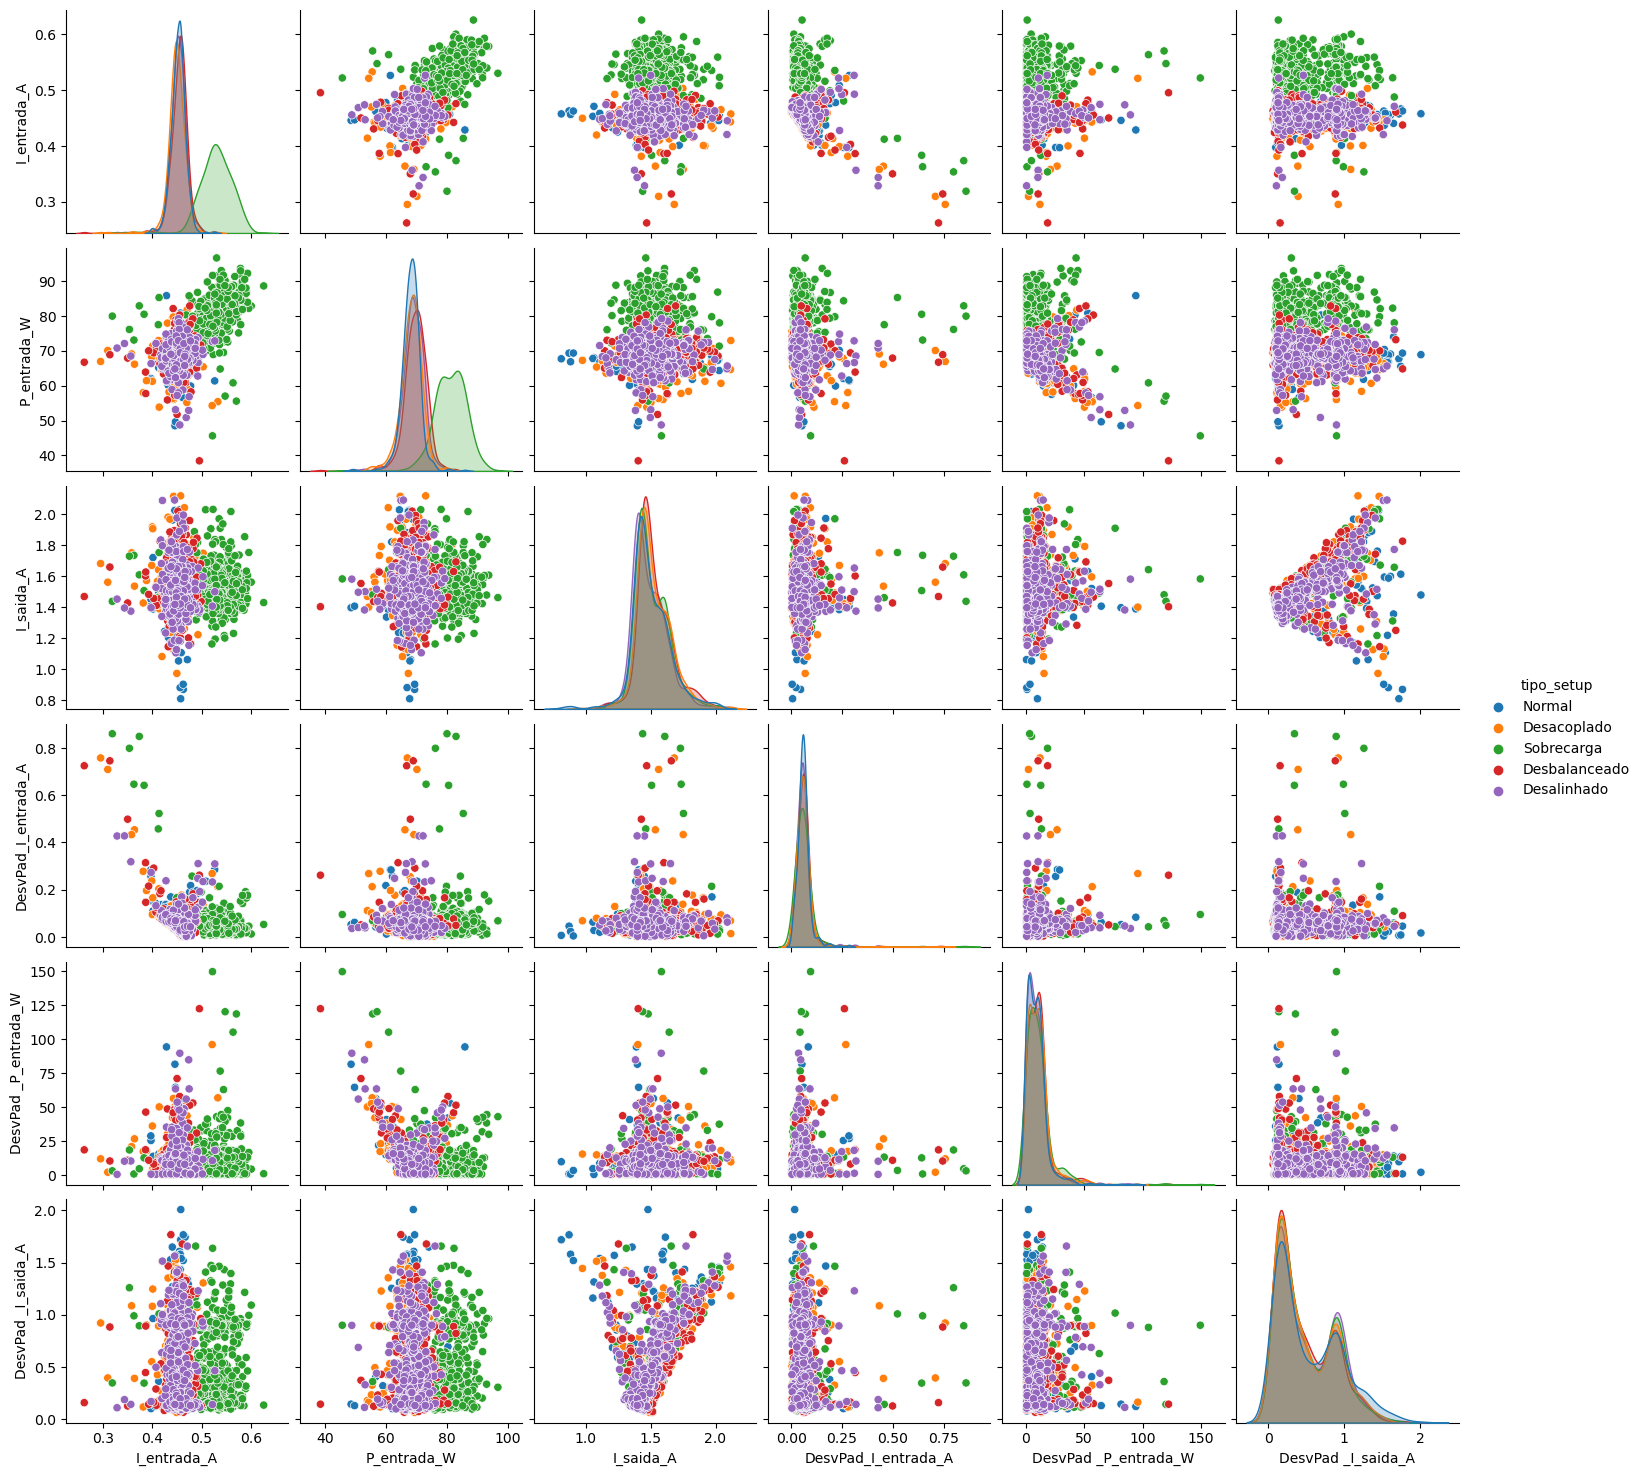

In [167]:
plt.figure(figsize=(10, 8))
sns.pairplot(subset_1, hue='tipo_setup')
plt.show()

<Figure size 1000x800 with 0 Axes>

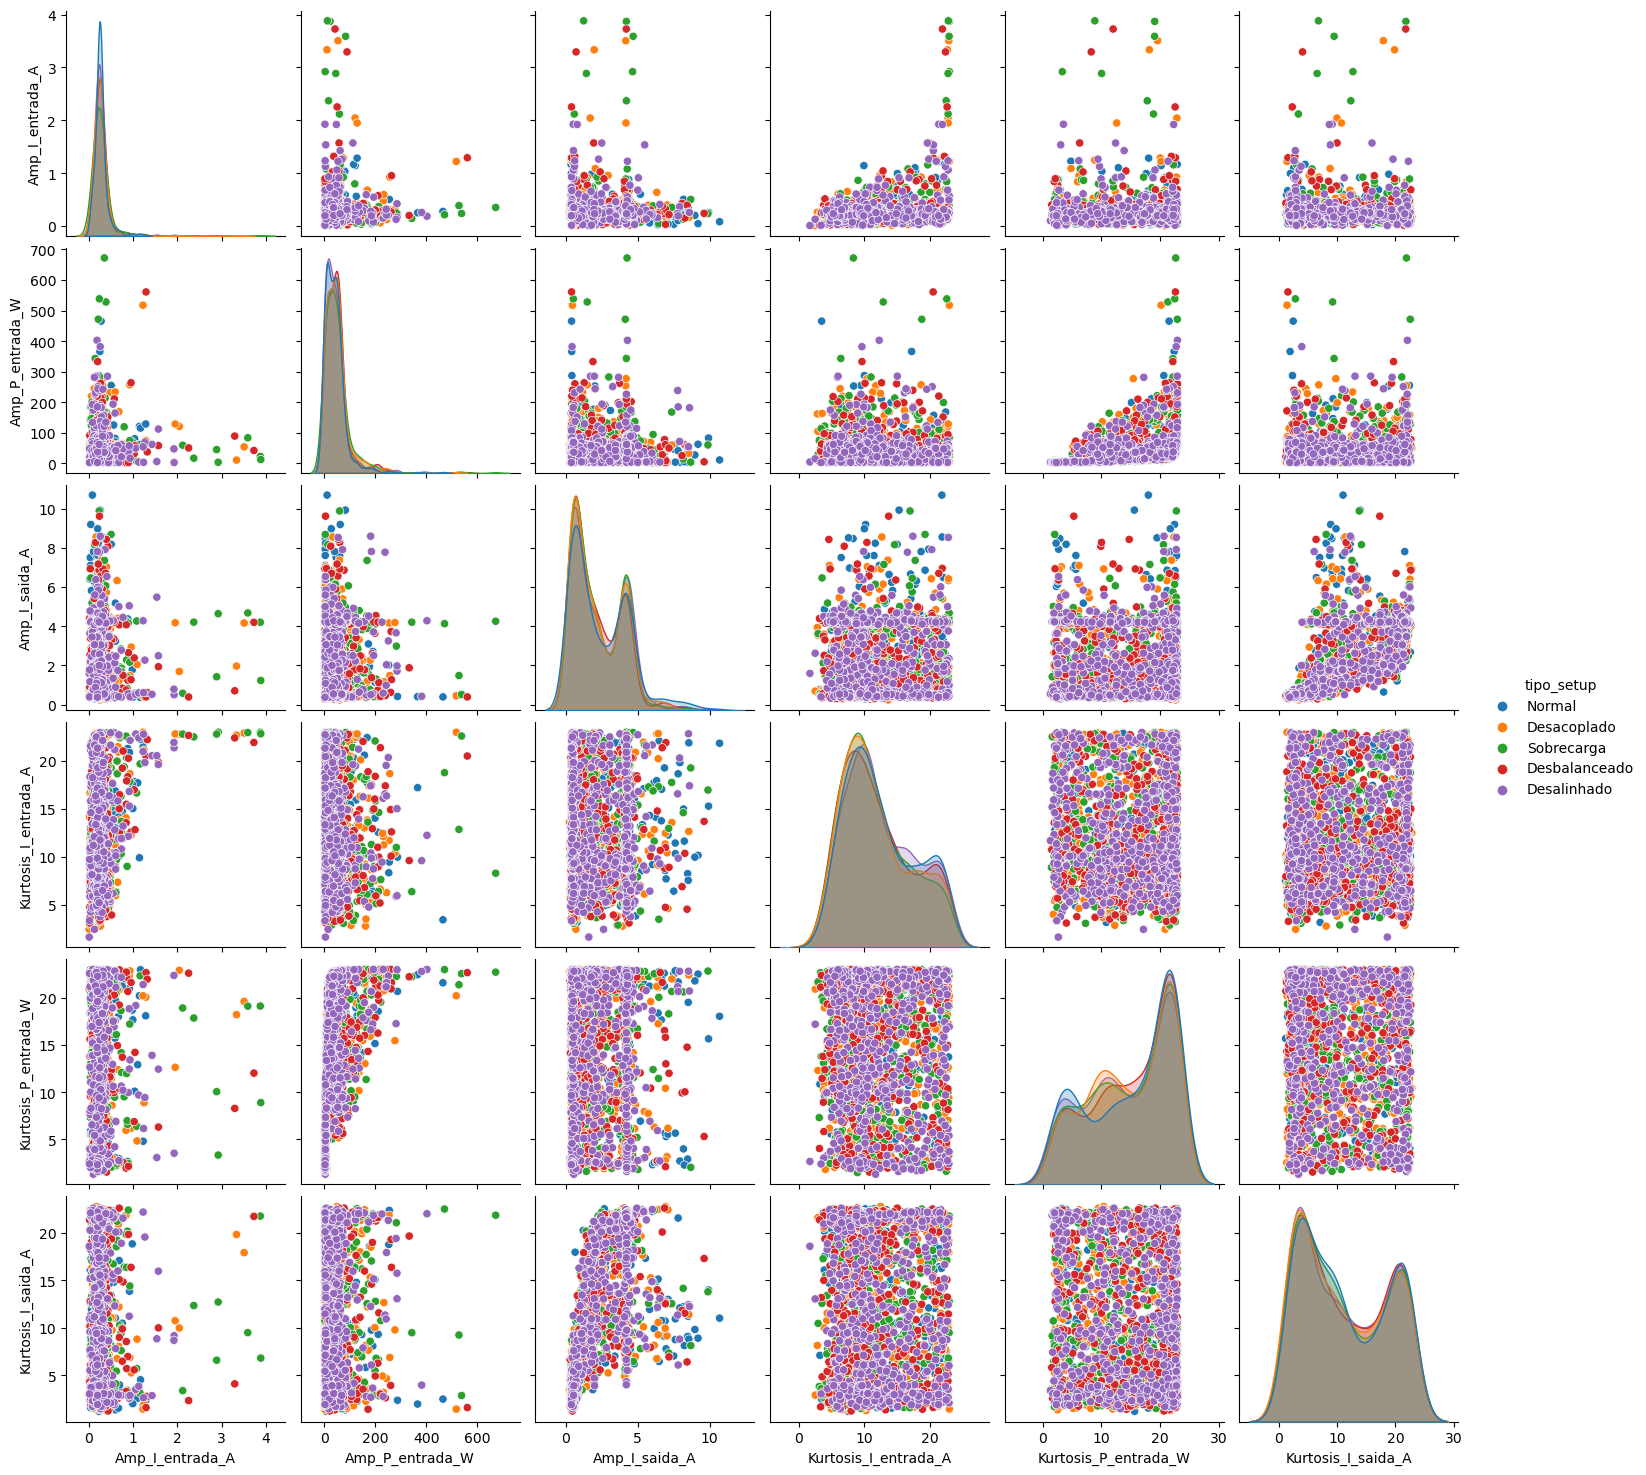

In [168]:
plt.figure(figsize=(10, 8))
sns.pairplot(subset_2, hue='tipo_setup')
plt.show()

<Figure size 1000x800 with 0 Axes>

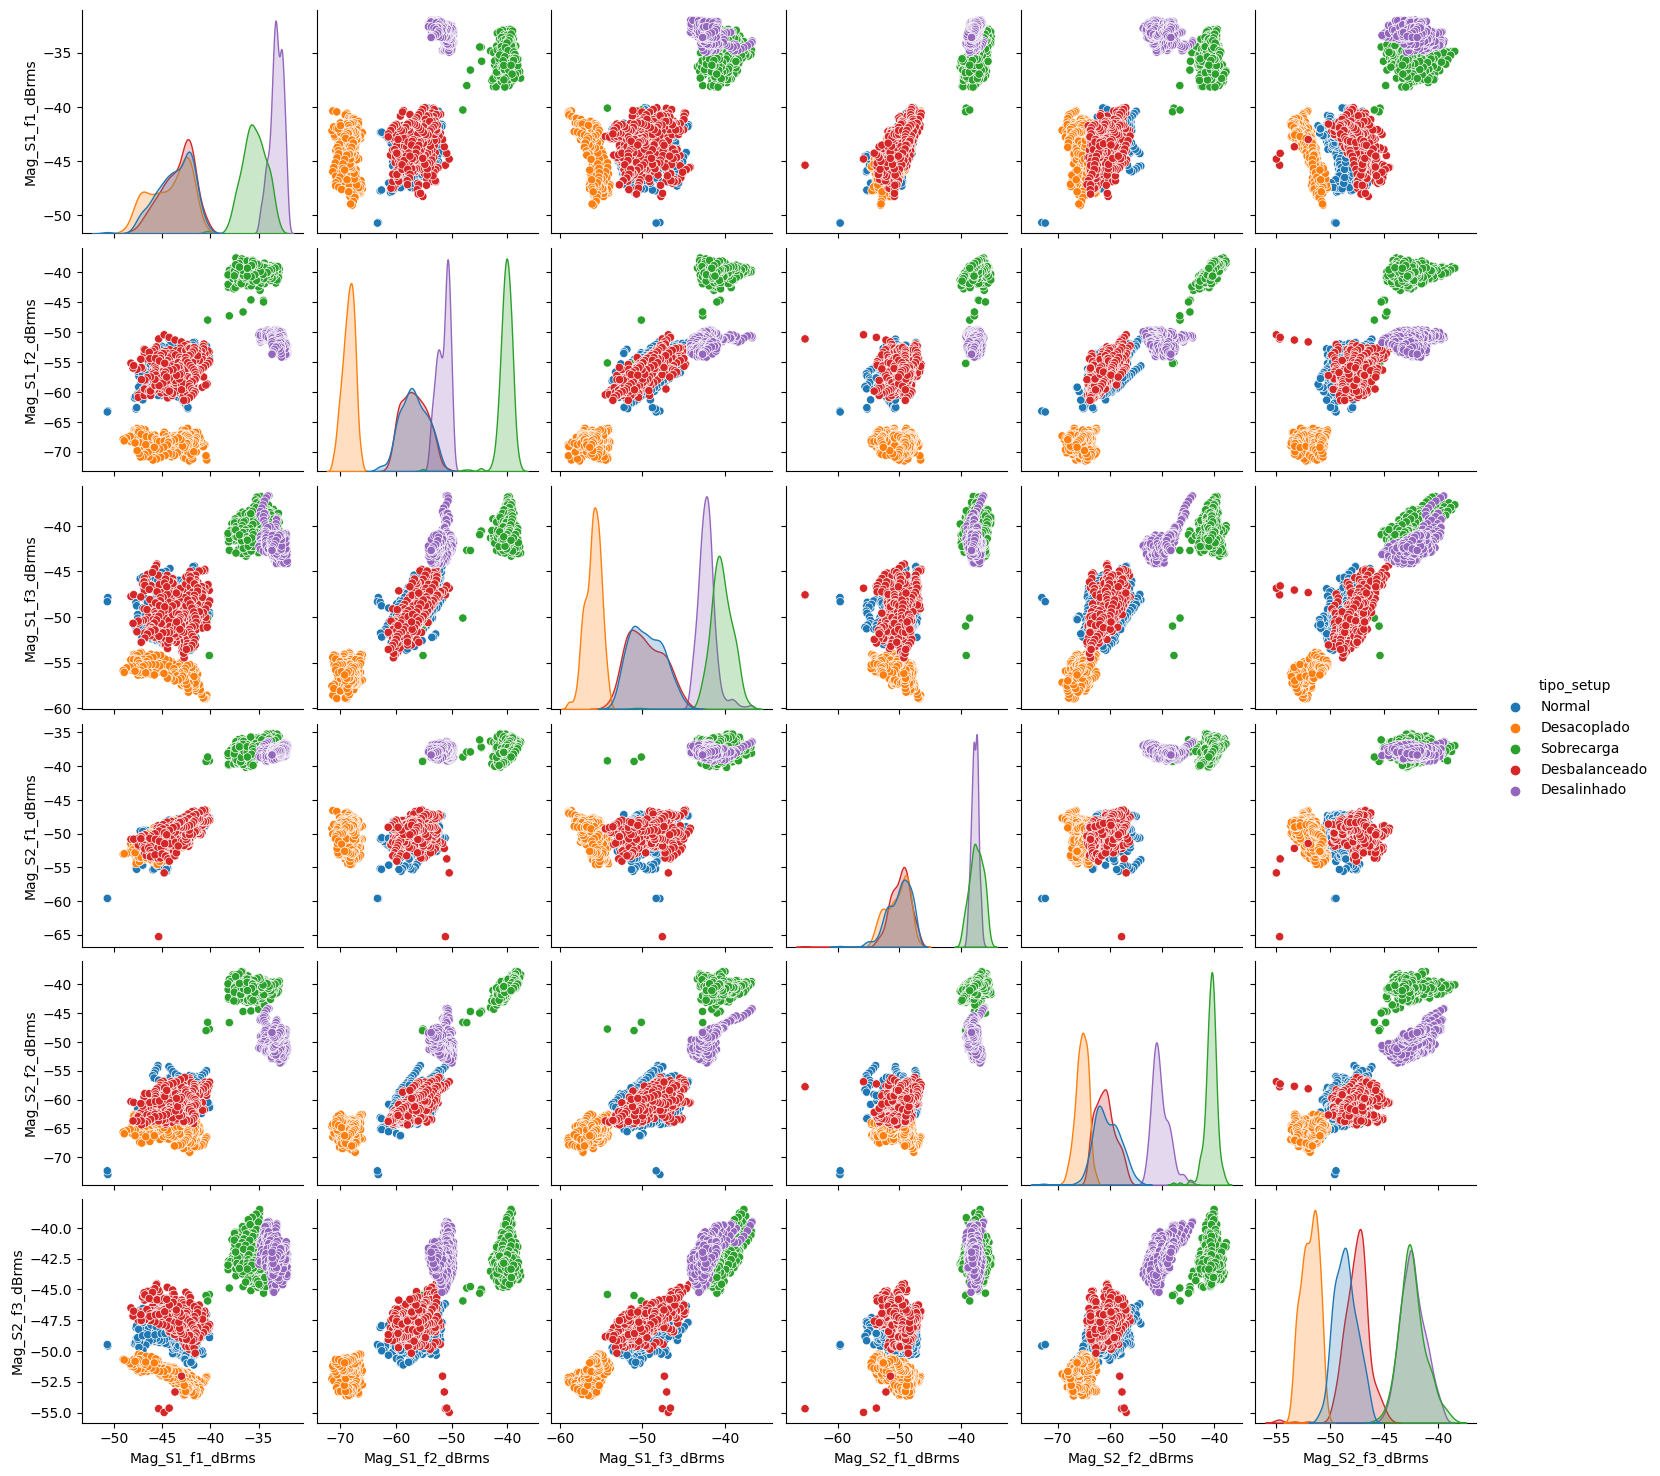

In [169]:
plt.figure(figsize=(10, 8))
sns.pairplot(subset_3, hue='tipo_setup')
plt.show()

<h3>Matriz de Correlação</h3>
A matriz de correlação permite verificar o grau de associação (correlação) entre duas ou mais variáveis. Correlações positivas indicam que, à medida que uma variável aumenta, a outra tende a aumentar; enquanto correlações negativas indicam que, quando uma aumenta, a outra tende a diminuir.

Ao identificar variáveis fortemente correlacionadas, é possível reduzir a dimensionalidade do conjunto de dados eliminando variáveis redundantes que fornecem informações similares. No entanto, a eliminação de variáveis a olho nu pode ser difícil quando um conjunto de dados é muito grande e, mesmo que duas variávies apresentem grande correlação, remover uma delas também pode ser prejudicial. Portanto, é importante que sejam utilizadas outras ferramentas, como filtros, para que erros pela intuição não sejam cometidos. De qualquer forma, a matriz é importante para que o engenheiro tenha conhecimento de seus dados e se sinta mais seguro ao confiar nas decisões de algum algoritmo para definir sua amostragem de dados.

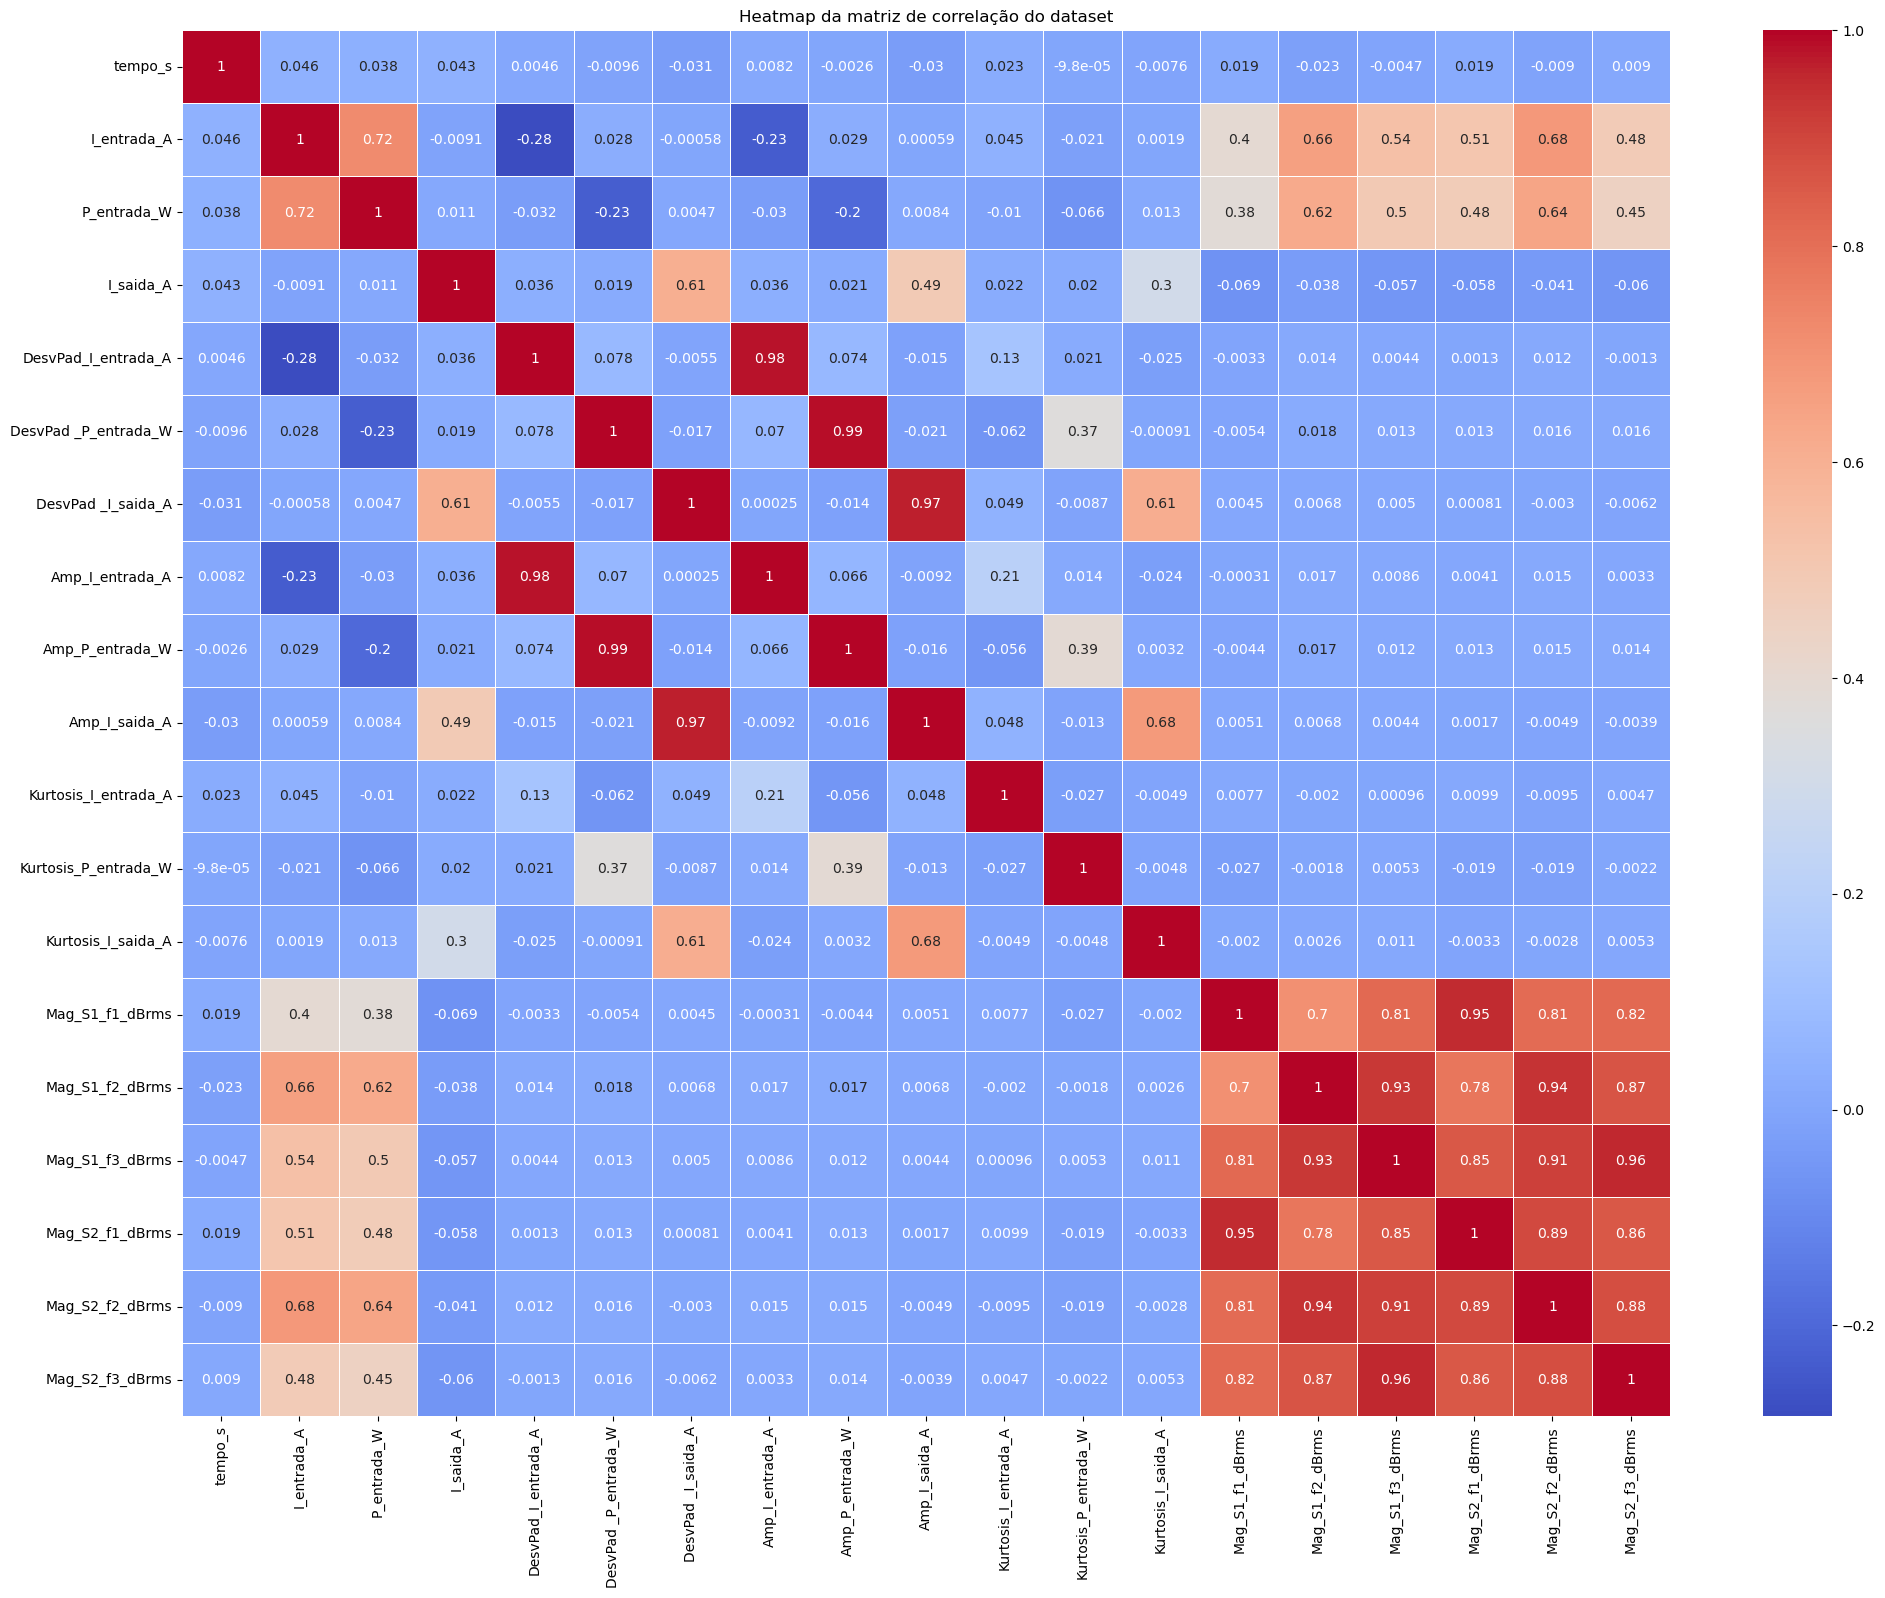

In [170]:
correlation_matrix = df.corr()
plt.figure(figsize=(24, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap da matriz de correlação do dataset')
plt.show()

Um elevado número de atributos faz com que o espaço de representação se torne mais esparso e a distância entre os objetos aumente ou fique mais indistinguível.
Situações nas quais a razão entre o número de atributos e o número de objetos é elevada geralmlente dificultam a modelagem dos dados, degradando o desempenho final do algoritmo de modelagem. Este prolema é enfrentado *reduzindo o valor desta razão*, que pode ser dada pelo aumento do denominador (número de objetos) ou redução do numerador (número de atirbutos). A redução do número de atributos pode ser feita pelo uso de um filtro, como foi feito abaixo, em que este valor foi reduzido para 6. Ao final, foram printados os atributos que o filtro escolheu para treinar o modelo.

In [171]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = df[df.columns[2:]]

y = df['tipo_setup']



selector = SelectKBest(score_func=mutual_info_classif, k=6) #mutual info aponta de uma forma diferente da matriz de correlação
X_reduced = selector.fit_transform(X, y)
selected_features = selector.get_support()


selected_feature_names = X.columns[selected_features]

X_reduced_df = pd.DataFrame(X_reduced, columns=selected_feature_names)

print(selected_feature_names.values)
# X_reduced_df

['Mag_S1_f1_dBrms' 'Mag_S1_f2_dBrms' 'Mag_S1_f3_dBrms' 'Mag_S2_f1_dBrms'
 'Mag_S2_f2_dBrms' 'Mag_S2_f3_dBrms']


<h5>O que é imprescindível para o projeto?</h5>

É essencial que em uma situação de falha o sistema não seja classificado como normal. Isso por conta de que quando uma falha não é reconhecida, a improdutividade de um sistema pode aumentar ou até mesmo acidentes podem acontecer. Sendo assim, a métrica mais importante para avaliar os cenários classificados como normais é a de recall, que contempla os falsos negativos (cenários com falha classificados como normais) em sua fórmula. A meta é minimizar a quantidade de falsos negativos, aumentando o valor da métrica de recall.
Para os cenários com falhas, a métrica mais relevante é a acurácia, que mede a taxa de acerto total. Isto porque não é tão grave um sistema normal ser classificado com falha, apesar de, obviamente, não ser o essencial.

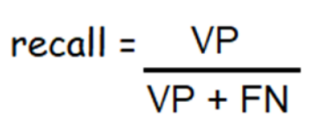
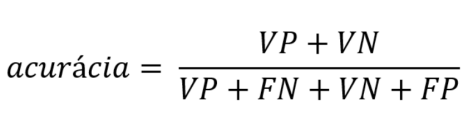

<h5>Seleção de atributos</h5>

A seleção de atributos visa *selecionar*, dentre os atributos originais, um subconjunto que melhore, ou até mesmo mantenha o desempenho preditivo quando comparado ao desempenho utilizando todos os atributos originais. Manter o desempenho ao reduzir os atributos também pode ser um bom resultado, já que com mais atributos há mais custo computacional e até mesmo financeiro. Os atributos redundantes ou irrelevantes são removidos.

O uso de <b>filtros</b> é uma ótima solção para a seleção de atributos. Eles utilizam as propriedades gerais dos atributos em um conjunto de dados, e da relação entre eles, para descartar ou filtrar atributos irrelevantes, ou redundantes. Por exemplo, se dois atributos apresentam uma alta correlação, eles podem ser descartados.

Com isso, na célula abaixo será utilizado um filtro da biblioteca sklearn, em que tem como 'k' a variável que armazena o número de atributos que queremos ter em um dataset reduzido em comparação ao original. Portanto, não se sabe ao certo qual o melhor número de atributos para uma melhora de desempenho do modelo. Por isso, será utilizado um laço do tipo while, que testa todos os tamanhos de dataset possíveis e analisa qual tem o melhor desempenho. Isso será feito para três algoritmos de classificação: KNN, Decision Tree e SVM





<h5>Amostragem Única</h5>

Esse tipo de separação pode subestimar a taxa de acerto, uma vez que um preditor produzido sobre todos os objetos em geral poderia apresentar uma taxa de acerto maior que a gerada a partir de uma parte deles. Abaixo, foi usada uma amostragem única, em que 30% dos dados são utilizados para teste.

<h3>Escolha do número de vizinhos do algoritmo KNN</h3>

Para um número de vizinhos baixo, por exemplo k=1, o modelo tende a ser muito sensível às variações nos dados de treino. O modelo se ajusta fortemente aos dados de treino, resultando em um baixo valor de bias. Isso pode levar ao overfitting. Assim, o valor de k não pode ser tão baixo. Porém, como visto no gráfico plotado na célula abaixo, se os valores de k crescem muito, a acurácia diminui consideravelmente, pois o modelo acaba generalizando mais, não se adaptando aos dados de treino. Então um valor muito alto pode não ser uma boa escolha. Também é recomendável que o valor de k seja ímpar para evitar empates na classificação. Nesse caso, o valor de k escolhido foi 5.

<h3>Métrica Euclidiana</h3>
Quando as variáveis são contínuas e tem escalas semelhantes, a métrica euclidiana pode se encaixar bem. Pelos atributos que o filtro selecionou na célula acima, pode-se concluir que esta é uma boa métrica.


c:\Users\pedro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\pedro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

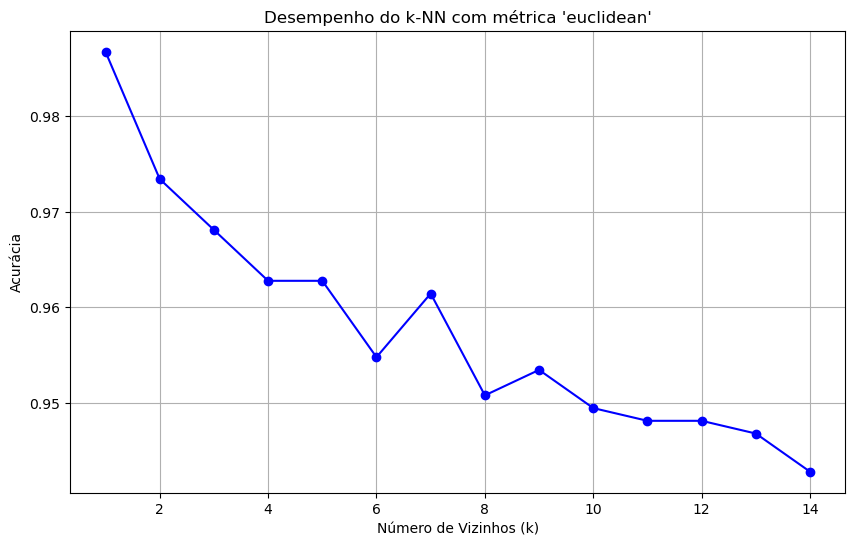

In [172]:
# Preparar o dataset para o modelo KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separando as features (X) e o target (y)
# X = df.drop(columns=['tipo_setup']).values
# y = df['tipo_setup'].values

# Dividindo o dataset em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X_reduced_df, y, test_size=0.3, random_state=42)

# Função para treinar e testar o modelo k-NN com diferentes valores de k e gerar relatórios de métricas
def knn_comparativo_com_metricas(k_values, metric='euclidean'):
    accuracy_results = []
    
    for k in k_values:
        # Criando o modelo k-NN
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        
        # Treinando o modelo
        knn.fit(X_train, y_train)
        
        # Fazendo previsões
        y_pred = knn.predict(X_test)
        
        # Calculando a acurácia
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_results.append(accuracy)
        
        # # Exibindo os resultados
        # print(f"k = {k}, Métrica: {metric}")
        # print(f"Acurácia: {accuracy:.4f}")
        # print("Matriz de Confusão:")
        # print(confusion_matrix(y_test, y_pred))
        # print("Relatório de Classificação:")
        # print(classification_report(y_test, y_pred))
        # print("-" * 40)
    
    # Plotando a acurácia para diferentes valores de k
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracy_results, marker='o', linestyle='-', color='b')
    plt.title(f"Desempenho do k-NN com métrica '{metric}'")
    plt.xlabel("Número de Vizinhos (k)")
    plt.ylabel("Acurácia")
    plt.grid(True)
    plt.show()

# Testando o k-NN com diferentes valores de k
k_values = list(range(1, 15))
knn_comparativo_com_metricas(k_values)

<h3>Comparação de 3 algoritmos de classificação: Decision Tree, SVM e KNN</h3>
Na célula abaixo, a partir de um filtro, serão testados todos os números de atributos possíveis "k" em um dataset por meio de um filtro para três diferentes algoritmos de classificação: Decision tree, SVM e KNN. Assim, serão imprimidos os valores encontrados de acurácia e de recall para a classe <b>Normal</b>, que, como supracitado, são imprescindíveis para o projeto. Com isso, baseado nos resultados, um dos três algoritmos será escolhido para classificar o cenário do sistema eletromecânico a partir do input de novos dados, os quais não foram usados para treinar o modelo.

In [173]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

metrics_dict_DecisionTree  = {}
metrics_dict_SVM = {}
metrics_dict_KNN = {}

i = 1
while i < 19:
    #Criação de dataset reduzido com a filtragem
    selector = SelectKBest(score_func=mutual_info_classif, k=i) #mutual info aponta de uma forma diferente da matriz de correlação//k = número de atributos// Seleciona os melhores atributos
    X_reduced = selector.fit_transform(X, y) #Cria o dataset reduzido
    selected_features = selector.get_support() 
    selected_feature_names = X.columns[selected_features] #Extrai o nome dos atributos selecionados
    X_reduced_df = pd.DataFrame(X_reduced, columns=selected_feature_names) #adiciona os atributos selecionados as colunas do dataset reduzido
    X_train, X_test, y_train, y_test = train_test_split(X_reduced_df, y, test_size=0.30, random_state=42, shuffle=True) #uso de train_test_split

    ################ Uso do algoritmo Decision Tree #######################################################################


    dtc = DecisionTreeClassifier(random_state=42) # Criar classificador DecisionTree
    dtc.fit(X_train, y_train) # Treinar modelo
    y_pred_dtc = dtc.predict(X_test)
    cm_dtc = confusion_matrix(y_test, y_pred_dtc) # Gerar um Matriz Confusão
    
    report_DecisionTree  = classification_report(y_test, y_pred_dtc, output_dict=True)
    
    metrics_dict_DecisionTree[i] = {
        'Normal': {'recall': report_DecisionTree['Normal']['recall'],},
        'Accuracy': report_DecisionTree['accuracy'],
        'atributos_selecionados': list(selected_feature_names)
    }    

    #######################################################

    ################## Uso do algoritmo SVM ################ ######################################################################

    X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_reduced_df, y, test_size=0.3, random_state=42)


    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_SVM) # ajustar a escala e transformar os dados
    X_test_scaled = scaler.transform(X_test_SVM) # transformar os dados com a escala já ajustada com os dados treino

    svm_clf = SVC(kernel='linear', C=1.0)

    # parâmetro C controla essa suavidade da margem:
    # (i) valor alto de C penaliza mais as classificações erradas e tenta evitar erros de classificação, criando uma margem menor.
    # (ii) valor baixo de C permite uma margem maior, permitindo que alguns pontos estejam do lado errado do hiperplano, 
    #      mas generalizando melhor.

    svm_clf.fit(X_train_scaled, y_train)

    from sklearn.metrics import classification_report, confusion_matrix

    # Fazer previsões de classes no conjunto de teste
    y_pred_svm_clf = svm_clf.predict(X_test_scaled)

    # Gerar um Matriz Confusão
    cm_svm_clf = confusion_matrix(y_test, y_pred_svm_clf)

    report_SVM = classification_report(y_test_SVM, y_pred_svm_clf, output_dict=True)

    metrics_dict_SVM[i] = {
        'Normal': {'recall': report_SVM['Normal']['recall'],},
        'Accuracy': report_SVM['accuracy'],
        'atributos_selecionados': list(selected_feature_names)
    }    


    ################################################Uso do KNN ######################################################################

    X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(X_reduced_df, y, test_size=0.3, random_state=42)

     # Criando o modelo k-NN
    knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    
    # Treinando o modelo
    knn.fit(X_train_KNN, y_train_KNN)
    
    # Fazendo previsões
    y_pred_KNN = knn.predict(X_test_KNN)

    report_KNN = classification_report(y_test_KNN, y_pred_KNN, output_dict=True)

    metrics_dict_KNN[i] = {
        'Normal': {'recall': report_KNN['Normal']['recall'],},
        'Accuracy': report_KNN['accuracy'],
        'atributos_selecionados': list(selected_feature_names)
    }    


    i+=1





max_recall_DecisionTree = 0
max_accuracy_DecisionTree = 0
max_accuracy_Normal_DecisionTree = 0
max_recall_key_DecisionTree = None
max_accuracy_key_DecisionTree = None
atributos_selecionados_Recall_DecisionTree = ""
atributos_selecionados_Acuracia_DecisionTree = "" 

# Iterar sobre o dicionário metrics_dict
for k, v in metrics_dict_DecisionTree.items():
    # Comparar a precisão
    if v['Normal']['recall'] > max_recall_DecisionTree:
        max_recall_DecisionTree = v['Normal']['recall']
        max_accuracy_Normal_DecisionTree = v['Accuracy']
        atributos_selecionados_Recall_DecisionTree = v['atributos_selecionados']
        max_recall_key_DecisionTree = k
        
    
    # Comparar a acurácia
    if v['Accuracy'] > max_accuracy_DecisionTree:
        max_accuracy_DecisionTree = v['Accuracy']
        atributos_selecionados_Acuracia_DecisionTree = v['atributos_selecionados']
        max_accuracy_key_DecisionTree = k

# Exibir os resultados
print("DECISION TREE")
print(f"Maior valor de recall para a classe 'Normal': {max_recall_DecisionTree}, número de atributos = {max_recall_key_DecisionTree}, acurácia para {max_recall_key_DecisionTree} atributos: {max_accuracy_Normal_DecisionTree},\natributos selecionados: {atributos_selecionados_Acuracia_DecisionTree}")
print(f"Maior valor de acurácia: {max_accuracy_DecisionTree}, número de atributos = {max_accuracy_key_DecisionTree}, \natributos selecionados: {atributos_selecionados_Acuracia_DecisionTree}")
# print(f"Atributos selecionados pelo filtro: {at}")


max_recall_SVM = 0
max_accuracy_Normal_SVM = 0
max_accuracy_SVM = 0
max_recall_key_SVM = None
max_accuracy_key_SVM = None
atributos_selecionados_Recall_SVM = ""
atributos_selecionados_Acuracia_SVM = ""

# Iterar sobre o dicionário metrics_dict
for k, v in metrics_dict_SVM.items():
    # Comparar a precisão
    if v['Normal']['recall'] > max_recall_SVM:
        max_recall_SVM = v['Normal']['recall']
        max_accuracy_Normal_SVM = v['Accuracy']
        atributos_selecionados_Recall_SVM = v['atributos_selecionados']
        max_recall_key_SVM = k
    
    # Comparar a acurácia
    if v['Accuracy'] > max_accuracy_SVM:
        max_accuracy_SVM = v['Accuracy']
        atributos_selecionados_Acuracia_SVM = v['atributos_selecionados']
        max_accuracy_key_SVM = k

# Exibir os resultados
print("SVM")
print(f"Maior valor de recall para a classe 'Normal': {max_recall_SVM}, número de atributos = {max_recall_key_SVM}, acurácia para {max_recall_key_SVM} atributos: {max_accuracy_Normal_SVM}\natributos selecionados: {atributos_selecionados_Recall_SVM}")
print(f"Maior valor de acurácia: {max_accuracy_SVM}, número de atributos = {max_accuracy_key_SVM},\natributos selecionados: {atributos_selecionados_Acuracia_SVM}")

max_recall_KNN = 0
max_accuracy_KNN = 0
max_accuracy_Normal_KNN = 0
max_recall_key_KNN = None
max_accuracy_key_KNN = None
atributos_selecionados_Recall_KNN = ""
atributos_selecionados_Acuracia_KNN = ""

# Iterar sobre o dicionário metrics_dict
for k, v in metrics_dict_KNN.items():
    # Comparar a precisão
    if v['Normal']['recall'] > max_recall_KNN:
        max_recall_KNN = v['Normal']['recall']
        max_accuracy_Normal_KNN = v['Accuracy']
        atributos_selecionados_Recall_KNN = v['atributos_selecionados']
        max_recall_key_KNN = k
    
    # Comparar a acurácia
    if v['Accuracy'] > max_accuracy_KNN:
        max_accuracy_KNN = v['Accuracy']
        atributos_selecionados_Acuracia_KNN = v['atributos_selecionados']
        max_accuracy_key_KNN = k

# Exibir os resultados
print("KNN")
print(f"Maior valor de recall para a classe 'Normal': {max_recall_KNN}, número de atributos = {max_recall_key_KNN}, acurácia para {max_recall_key_KNN} atributos: {max_accuracy_Normal_KNN}\natributos selecionados: {atributos_selecionados_Recall_KNN}")
print(f"Maior valor de acurácia: {max_accuracy_KNN}, número de atributos = {max_accuracy_key_KNN},\natributos selecionados: {atributos_selecionados_Acuracia_KNN}")



c:\Users\pedro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pedro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pedro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pedro\anaconda3\lib\site-packages\sklearn\neig

DECISION TREE
Maior valor de recall para a classe 'Normal': 0.8709677419354839, número de atributos = 6, acurácia para 6 atributos: 0.9375,
atributos selecionados: ['Mag_S1_f1_dBrms', 'Mag_S1_f2_dBrms', 'Mag_S1_f3_dBrms', 'Mag_S2_f1_dBrms', 'Mag_S2_f2_dBrms', 'Mag_S2_f3_dBrms']
Maior valor de acurácia: 0.9375, número de atributos = 6, 
atributos selecionados: ['Mag_S1_f1_dBrms', 'Mag_S1_f2_dBrms', 'Mag_S1_f3_dBrms', 'Mag_S2_f1_dBrms', 'Mag_S2_f2_dBrms', 'Mag_S2_f3_dBrms']
SVM
Maior valor de recall para a classe 'Normal': 0.9935483870967742, número de atributos = 2, acurácia para 2 atributos: 0.785904255319149
atributos selecionados: ['Mag_S1_f2_dBrms', 'Mag_S2_f2_dBrms']
Maior valor de acurácia: 0.9361702127659575, número de atributos = 6,
atributos selecionados: ['Mag_S1_f1_dBrms', 'Mag_S1_f2_dBrms', 'Mag_S1_f3_dBrms', 'Mag_S2_f1_dBrms', 'Mag_S2_f2_dBrms', 'Mag_S2_f3_dBrms']
KNN
Maior valor de recall para a classe 'Normal': 0.896774193548387, número de atributos = 6, acurácia para 6 a

c:\Users\pedro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<h1>Análise de Resultados</h1>
A partir dos resultados acima, pode-se concluir que o melhor algoritmo seria o <b>KNN</b>. Por mais que ele não possua o maior valor de recall, ele possui um valor de acurácia alto(96,3%) para a situação em que seu valor de recall é o mais alto para a classe normal(89,7%).Nesse caso, o número de atributos utilizado foi 6 e os atributos selecionados pelo filtro foram: 'Mag_S1_f1_dBrms', 'Mag_S1_f2_dBrms', 'Mag_S1_f3_dBrms', 'Mag_S2_f1_dBrms', 'Mag_S2_f2_dBrms', 'Mag_S2_f3_dBrms'

O algoritmo SVM consegue atingir um resultado de 99% de recall para a classe normal quando usa 2 atributos, porém sua acurácia com 2 atributos fica relativamente baixa e o uso de apenas 2 atributos pode gerar overfitting.


<h5>Classificação com base em dados novos</h5>

In [220]:
selector_user= SelectKBest(score_func=mutual_info_classif, k=6)
X_reduced_user = selector_user.fit_transform(X, y)

X_train_KNN_user, X_test_KNN_user, y_train_KNN_user, y_test_KNN_user = train_test_split(X_reduced_user, y, test_size=0.3, random_state=42)

# Criando o modelo k-NN
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Treinando o modelo
knn.fit(X_train_KNN_user, y_train_KNN_user)

y_pred_KNN_user = knn.predict(X_test_KNN_user)

report_KNN = classification_report(y_test_KNN, y_pred_KNN_user, output_dict=True)
print(report_KNN)


{'Desacoplado': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 144}, 'Desalinhado': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 143}, 'Desbalanceado': {'precision': 0.9012345679012346, 'recall': 0.9240506329113924, 'f1-score': 0.9125, 'support': 158}, 'Normal': {'precision': 0.9205298013245033, 'recall': 0.896774193548387, 'f1-score': 0.9084967320261438, 'support': 155}, 'Sobrecarga': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 152}, 'accuracy': 0.9627659574468085, 'macro avg': {'precision': 0.9643528738451476, 'recall': 0.9641649652919559, 'f1-score': 0.9641993464052288, 'support': 752}, 'weighted avg': {'precision': 0.962868591667145, 'recall': 0.9627659574468085, 'f1-score': 0.9627553104575163, 'support': 752}}


c:\Users\pedro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [221]:
# Função para Previsão com Entrada de Atributos Originais

def make_prediction_with_original_attributes():
    print("\nDigite os valores para os atributos originais:")
    try:
        # Entrada do usuário para os quatro atributos
        I_entrada = float(input("Corrente de entrada (A):"))
        P_entrada = float(input("Potência de entrada (W):"))
        I_saida = float(input("Corrente de saída (A):"))
        desvpad_I_entrada = float(input("Desvio Padrão da corrente de entrada (A):"))
        desvpad_P_entrada = float(input("Desvio Padrão da potência de entrada (W):"))
        desvpad_I_saida = float(input("Desvio Padrão da corrente de saída (A):"))
        amp_I_entrada = float(input("Amplitude do sinal RMS de corrente de entrada (A):"))
        amp_P_entrada = float(input("Amplitude do sinal RMS de potência de entrada (W):"))
        amp_I_saida = float(input("Amplitude do sinal RMS de corrente de saída (A):"))
        kurtosis_I_entrada = float(input("Curtose do sinal RMS de corrente de entrada do inversor de porência (A):"))
        kurtosis_P_entrada = float(input("Curtose do sinal RMS de potência de entrada do inversor de porência (W):"))
        kurtosis_I_saida = float(input("Curtose do sinal RMS de corrente de saída do inversor de porência (A):"))
        Mag_S1_f1 = float(input("Amplitude Power Spectrum do sinal de vibração e suas harmônicas S1f1 (dB rms g):"))
        Mag_S1_f2 = float(input("Amplitude Power Spectrum do sinal de vibração e suas harmônicas S1f2 (dB rms g):"))
        Mag_S1_f3 = float(input("Amplitude Power Spectrum do sinal de vibração e suas harmônicas S1f3 (dB rms g):"))
        Mag_S2_f1 = float(input("Amplitude Power Spectrum do sinal de vibração e suas harmônicas S2f1 (dB rms g):"))
        Mag_S2_f2 = float(input("Amplitude Power Spectrum do sinal de vibração e suas harmônicas S2f2 (dB rms g):"))
        Mag_S3_f3 = float(input("Amplitude Power Spectrum do sinal de vibração e suas harmônicas S3f3 (dB rms g):"))
        # X = df[df.columns[2:]]

        # y = df['tipo_setup']




        # Criar um array com os dados do usuário
        user_data = np.array([[I_entrada, P_entrada, I_saida, desvpad_I_entrada, desvpad_P_entrada, 
                       desvpad_I_saida, amp_I_entrada, amp_P_entrada, amp_I_saida, 
                       kurtosis_I_entrada, kurtosis_P_entrada, kurtosis_I_saida, 
                       Mag_S1_f1, Mag_S1_f2, Mag_S1_f3, Mag_S2_f1, Mag_S2_f2, Mag_S3_f3]])
        
        columns = df.columns[2:]
        user_data_df = pd.DataFrame(user_data, columns=columns)
        print(user_data_df)


        selector = SelectKBest(score_func=mutual_info_classif, k=6)

        # Para que o fit_transform funcione, você precisa também ter um conjunto de dados de entrada (X) 
        # e rótulos (y) de treinamento, com os quais o modelo aprenderá a relação.

        X = df[df.columns[2:]]

        y = df['tipo_setup']


        # Ajustar o selector aos dados de treinamento
        selector.fit_transform(X, y)

        user_data_reduced = selector.transform(user_data_df)

        print(user_data_reduced)

        # Reduzir os dados do usuário com base no selector treinado
        selected_features = X.columns[selector.get_support()]  # Obter as colunas selecionadas
        user_data_reduced_df = pd.DataFrame(user_data_reduced, columns=selected_features)
        
        prediction = knn.predict(user_data_reduced_df)
        
        print(prediction)


    except ValueError:
        print(ValueError)
        print("Entrada inválida! Certifique-se de que está inserindo números.")

# Chamar a função de previsão com atributos originais
while True:
    choice = input("\nDeseja fazer uma previsão com atributos originais? (s/n): ").lower()
    if choice == 's':
        make_prediction_with_original_attributes()
    elif choice == 'n':
        print("Encerrando o processo.")
        break
    else:
        print("Escolha inválida. Digite 's' para Sim ou 'n' para Não.")


Escolha inválida. Digite 's' para Sim ou 'n' para Não.
Escolha inválida. Digite 's' para Sim ou 'n' para Não.
Escolha inválida. Digite 's' para Sim ou 'n' para Não.
Escolha inválida. Digite 's' para Sim ou 'n' para Não.
Escolha inválida. Digite 's' para Sim ou 'n' para Não.
Escolha inválida. Digite 's' para Sim ou 'n' para Não.
Escolha inválida. Digite 's' para Sim ou 'n' para Não.
Escolha inválida. Digite 's' para Sim ou 'n' para Não.
Escolha inválida. Digite 's' para Sim ou 'n' para Não.
Escolha inválida. Digite 's' para Sim ou 'n' para Não.
Escolha inválida. Digite 's' para Sim ou 'n' para Não.

Digite os valores para os atributos originais:


c:\Users\pedro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\pedro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


   I_entrada_A  P_entrada_W  I_saida_A  DesvPad_I_entrada_A  \
0          0.5         71.0        1.5                 0.11   

   DesvPad _P_entrada_W  DesvPad _I_saida_A  Amp_I_entrada_A  Amp_P_entrada_W  \
0                  12.0                 0.5              0.6             41.0   

   Amp_I_saida_A  Kurtosis_I_entrada_A  Kurtosis_P_entrada_W  \
0            2.5                  10.0                   7.0   

   Kurtosis_I_saida_A  Mag_S1_f1_dBrms  Mag_S1_f2_dBrms  Mag_S1_f3_dBrms  \
0                20.0            -33.0            -53.0            -42.0   

   Mag_S2_f1_dBrms  Mag_S2_f2_dBrms  Mag_S2_f3_dBrms  
0            -38.0            -48.0            -41.0  
[[-33. -53. -42. -38. -48. -41.]]
['Desalinhado']
Encerrando o processo.
